In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def apply_rules(s):
    """ Hilbert Curve as a Lindenmayer system (L-system)
    https://en.wikipedia.org/wiki/Hilbert_curve#Representation_as_Lindenmayer_system"""
    s=s.replace("a","-Bf+AfA+fB-")  # capital letters "A" and "B" so that the second operation
    s=s.replace("b","+Af-BfB-fA+")  # doesn't apply to the changes already made
    return s.lower() # make everyone lowercase

axiom = "a"
n=3 # number of iterations
# displacements, ordered in a counter-clockwise direction
dxdy = np.array([[ 1, 0],    # right
                 [ 0, 1],    # up
                 [-1, 0],    # left
                 [ 0,-1] ])  # down
# displacement is of size 1, so the higher n is, the greater the domain
length = 2**n-1; margin = 0.05*length
domain = [0-margin,length+margin,0-margin,length+margin] # a 5% margin around the curve
s = axiom # string to iterate upon

for i in np.arange(n):
    s = apply_rules(s)


In [3]:
s

'-+-bf+afa+fb-f-+af-bfb-fa+f+af-bfb-fa+-f-bf+afa+fb-+f+-+af-bfb-fa+f+-bf+afa+fb-f-bf+afa+fb-+f+af-bfb-fa+-f-+af-bfb-fa+f+-bf+afa+fb-f-bf+afa+fb-+f+af-bfb-fa+-+f+-bf+afa+fb-f-+af-bfb-fa+f+af-bfb-fa+-f-bf+afa+fb-+-'

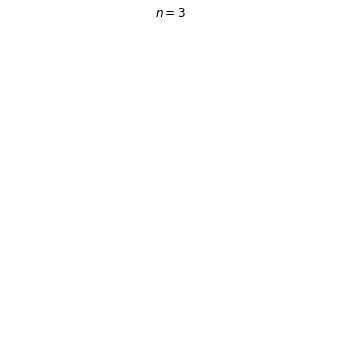

In [13]:
plt.ion()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('off')                        # no frame
ax.axis(domain)                       # domain size
ax.set_aspect('equal')                # square look
ax.set_xticks([]); ax.set_yticks([])  # no ticks
ax.set_title(r"$n = {:d}$".format(n))
plt.show()


In [14]:
s=s.replace("a","")
s=s.replace("b","")

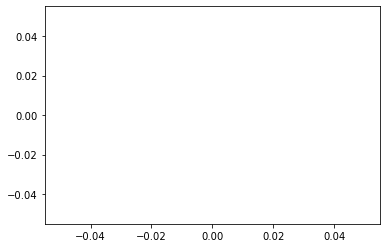

In [15]:
p = np.array([[0.0,0.0]]) # this is the starting point (0,0)
p_plot, = plt.plot(p[:,0],p[:,1],color="black")


In [16]:
# iterate on the string s
for i,c in enumerate(s):
    # uncomment to see how fast things are going
    # print("{:d}/{:d}".format(i,len(s)))
    
    # rotations "+" and "-" change the displacement array dxdy
    # "+" means clockwise rotation
    if c == '+': dxdy = np.roll(dxdy,+1,axis=0)
    # "-" means counter-clockwise rotation
    if c == '-': dxdy = np.roll(dxdy,-1,axis=0)
    # forward "f"
    if c == 'f':
        # add one more point to array p
        p = np.vstack([p, [p[-1,0]+dxdy[0,0],p[-1,1]+dxdy[0,1]] ])
        # update p_plot data, this is MUCH faster that plotting
        # several line segments separately
        p_plot.set_data(p[:,0],p[:,1])
        fig.canvas.draw()
        plt.show()

In [17]:
plt.show()